In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

import matplotlib.style as style
style.use('seaborn-paper')

/var/folders/5h/9n52gp3n60j_ly1hq8dd3lsw0000gn/T/ipykernel_44023/3029071942.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-paper')


## Non-Voters

### Read a dataset from local file

In the filepath, we will write out the directions to navigate to the CSV file that holds our data. The `..` indicates that we will go up one folder in the directory, and the `/` means we will go into that folder. 

So the filepath `../datasets/non-voters/nonvoters_data.csv` directs Pandas to go out of our current folder (`02-Lesson_2`) into the root folder (`intro-ds-course`). Then we use `/datasets` to navigate to the `datasets` folder, and so on.

This data is also hosted on our Google Drive [here](https://docs.google.com/spreadsheets/d/1KRch6lVlS8iJtayzFcJhzw8k7RBpM8gOhWQIZjJbRWY/edit#gid=1816052205). While you can make all of the visuals we make in this Notebook on Google Sheets, with a bit of practice, we bet you will find it much easier to make them in Python!

In [125]:
# read dataset from local file
df = pd.read_csv('../datasets/non-voters/nonvoters_data.csv')

# show the first 5 rows of the data as a sample
df.head()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


This dataset consists of about 30 questions to understand why Americans do or do not vote (hosted [here](https://drive.google.com/drive/u/0/folders/1onNiqbnz7CyiQai3Kuqg6vM1ogkJQ7bG)). In addition, several demographics questions were asked, to better understand the respondent's backgrounds.

## Demographics

Let's start by visualizing the demographics of people who were polled.

There are a few general ways to plot data in Matplotlib. While this may seem like a lot, it is to help provide us flexibility to quickly make new graphs.

Methods:
1. `df.plot()`: we can directly plot a Pandas DataFrame or Series object using the `.plot()` operator. By specifying the `kind` keyword argument, we can quickly specify if we would like to plot a bar or pie graph, for example. 
2. `ax.plot()`: a more formal way to plot after creating a Figure and Axis object. While this takes a bit more code to setup, this gives us the most control of the graph so that we can customize the visualizations.

In [126]:
# for categorical variables, we can count the number of times they occured in the dataset using `.value_counts()`
df['voter_category'].value_counts()

sporadic        2574
always          1811
rarely/never    1451
Name: voter_category, dtype: int64

<AxesSubplot: ylabel='voter_category'>

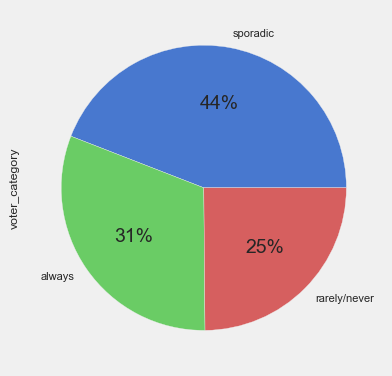

In [127]:
# here we specify kind='pie' to make a pie chart
# we also add the group percentage using autopct which rounds to 0 decimal places
df['voter_category'].value_counts().plot(kind='pie', autopct='%1.0f%%')

Text(0, 0.5, 'Number of Respondents')

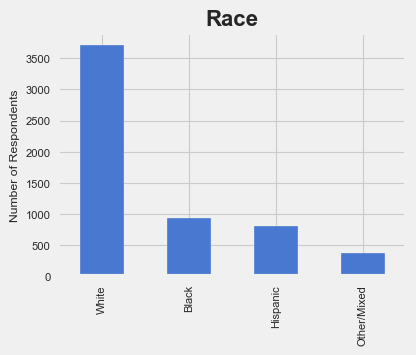

In [128]:
# this is a hybrid of methods 1 and 2
# first, we create our figure and axis objects
fig, ax = plt.subplots(figsize=(4,3))

# similarly to before, we grab the Series we want to plot and select kind='bar' to make a bar plot
# we add the argument `ax=ax` to pass this visual to the axis object
df['race'].value_counts().plot(kind='bar', ax=ax)

# we can add more customization to the axis object, like setting a title and labels
ax.set_title('Race', fontsize=16, weight='bold')
ax.set_ylabel('Number of Respondents')


Text(0, 0.5, 'Number of Respondents')

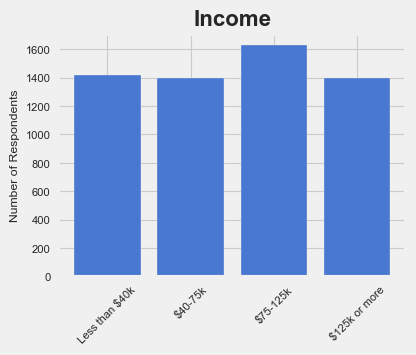

In [129]:
# This is the most formal way to plot, where we create the figure and axis objects and plot using ax.plot()

# first, we will get our data for the income
income = df['income_cat'].value_counts()

# income is inherently ordered (e.g. 40k < 75k < 125k), but because of the string titles, the order is wrong
# we will create the right order and then reindex our Series object so that it's in the right order
orderList = ['Less than $40k', '$40-75k', '$75-125k', '$125k or more']
income = income.reindex(orderList)

# here we create our figure and axis objects
fig, ax = plt.subplots(figsize=(4,3))

# we add a bar plot. note that a bar plot takes an x and y input. The x will be the labels, and the y are the values
ax.bar(income.index, income)

# we can customize our visual since we have the axis object `ax`. Let's rotate the labels so that 
# they aren't overlapping, add a title, and add labels
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Income', fontsize=16, weight='bold')
ax.set_ylabel('Number of Respondents')

In [207]:
party = {1: 'Republican',
         2: 'Democrat',
         3: 'Independent',
         4: 'Another party', 
         5: 'No preference',
         -1: np.nan}

df['Q30'] = df['Q30'].replace(party)

## Pivot Tables

Next, we would like to analyze multiple columns together. For example, how do different races or income brackets tend to vote? One useful method to analyze aggregate data across many discrete categories is a pivot table. 

The major components of a pivot table are:
* `index`: which is the row. In our case, we will use `voter_category`
* `column`: which is the column. We will use several columns, for example `race` and `income_cat`
* `values`: is the data we will be aggregating
* `aggfunc`: is the method of aggregating. Methods include `count` and `mean`, which describe what operator we will summarize our data with

In [130]:
df2 = df[['RespId', 'voter_category', 'income_cat', 'gender', 'race', 'Q30']]
pt = df.pivot_table(index='voter_category', columns='race', values='RespId', aggfunc='count')
pt

race,Black,Hispanic,Other/Mixed,White
voter_category,,,,
always,288,168,86,1269
rarely/never,224,244,121,862
sporadic,420,401,174,1579


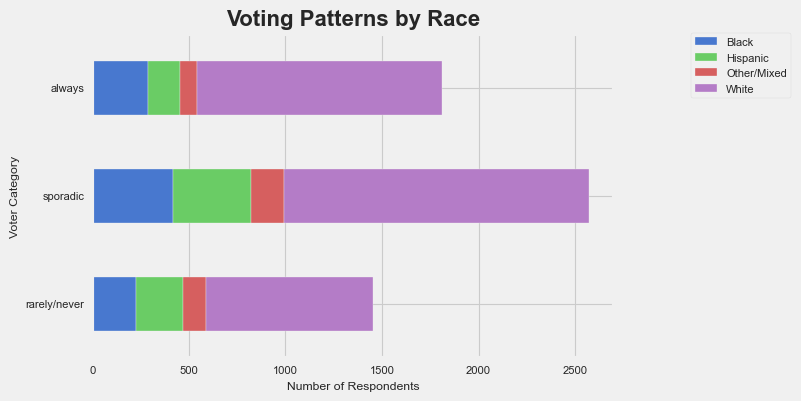

In [131]:
fig, ax = plt.subplots(figsize=(6,4))
pt = pt.reindex(['rarely/never', 'sporadic', 'always'])
pt.plot(kind='barh', stacked=True, ax=ax)
ax.set_ylabel('Voter Category')
ax.set_xlabel('Number of Respondents')
ax.set_title('Voting Patterns by Race', fontsize=16, weight='bold')
ax.legend(bbox_to_anchor=(1.35, 1.02))

While this is a good start, it's hard to make comparisons in this format. Let's switch the index and column so that it's clearer how individual races tend to vote.

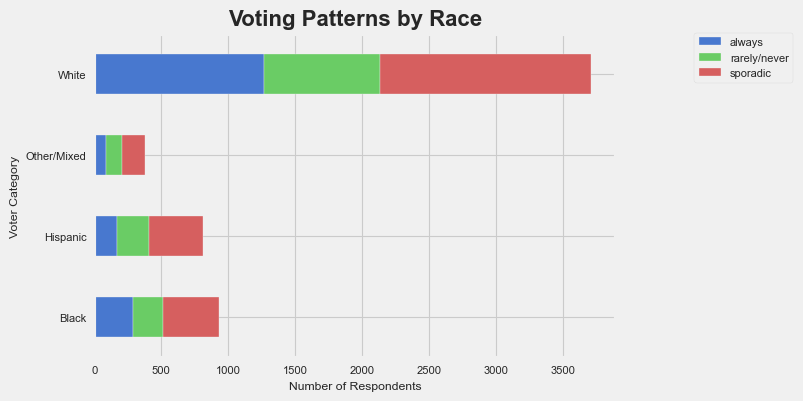

In [134]:
pt = df.pivot_table(index='race', columns='voter_category', values='RespId', aggfunc='count')
fig, ax = plt.subplots(figsize=(6,4))
pt.plot(kind='barh', stacked=True, ax=ax)
ax.set_ylabel('Voter Category')
ax.set_xlabel('Number of Respondents')
ax.set_title('Voting Patterns by Race', fontsize=16, weight='bold')
ax.legend(bbox_to_anchor=(1.35, 1.02))

This is an improvement, but because of the sampling disparity with a majority of white respondents, it can be hard to make direct comparisons. Let's normalize the data so that it's easy to compare between racial groups. This will let us describe the voting proportions each race tends towards.

In [148]:
pt

voter_category,always,rarely/never,sporadic
race,,,
Black,288,224,420
Hispanic,168,244,401
Other/Mixed,86,121,174
White,1269,862,1579


In [195]:
pt = df.pivot_table(index='race', columns='voter_category', values='RespId', aggfunc='count')
pt = (pt.transpose() / pt.sum(axis=1)).transpose()
pt

voter_category,always,rarely/never,sporadic
race,,,
Black,0.309013,0.240343,0.450644
Hispanic,0.206642,0.300123,0.493235
Other/Mixed,0.225722,0.317585,0.456693
White,0.342049,0.232345,0.425606


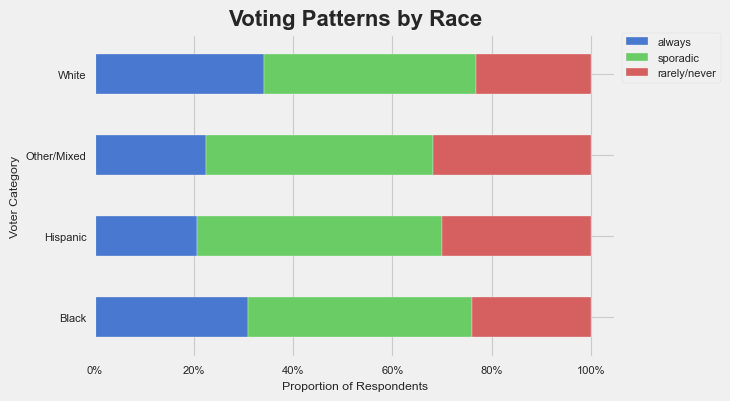

In [193]:
pt = df.pivot_table(index='race', columns='voter_category', values='RespId', aggfunc='count')
pt = pt.transpose() / pt.sum(axis=1)
pt = pt.transpose()
pt = pt[['always', 'sporadic', 'rarely/never']]

fig, ax = plt.subplots(figsize=(6,4))
pt.plot(kind='barh', stacked=True, ax=ax)
ax.set_ylabel('Voter Category')
ax.set_xlabel('Proportion of Respondents')
ax.set_title('Voting Patterns by Race', fontsize=16, weight='bold')
ax.legend(bbox_to_anchor=(1, 1.02))
ax.xaxis.set_major_formatter(PercentFormatter(1))

This looks significantly better, as now it's easy to compare relative proportions of the voting groups across each race. However, we will want to use this to analyze many columns, so we will create a function. 

Functions are blocks of reusable code that take an input to produce an output. We use the `mypy` hint typing to make the inputs explicit. 

In [187]:
def normalized_stacked_barplots(df: pd.DataFrame, 
                                column: str = 'race',
                                order: list = None) -> None:
    """
    Docstring: 
    """

    assert column in df.columns, "Input column does not exist in DataFrame"

    pt = df.pivot_table(index=column, columns='voter_category', values='RespId', aggfunc='count')
    pt = pt.transpose() / pt.sum(axis=1)
    pt = pt.transpose()
    pt = pt[['always', 'sporadic', 'rarely/never']]

    if order:
        pt = pt.reindex(order)

    _, ax = plt.subplots(figsize=(6,4))
    pt.plot(kind='barh', stacked=True, ax=ax)
    ax.set_ylabel('Voter Category')
    ax.set_xlabel('Proportion of Respondents')
    ax.set_title('Voting Patterns by Race', fontsize=16, weight='bold')
    ax.legend(bbox_to_anchor=(1, 1.02))
    ax.xaxis.set_major_formatter(PercentFormatter(1))

    return None

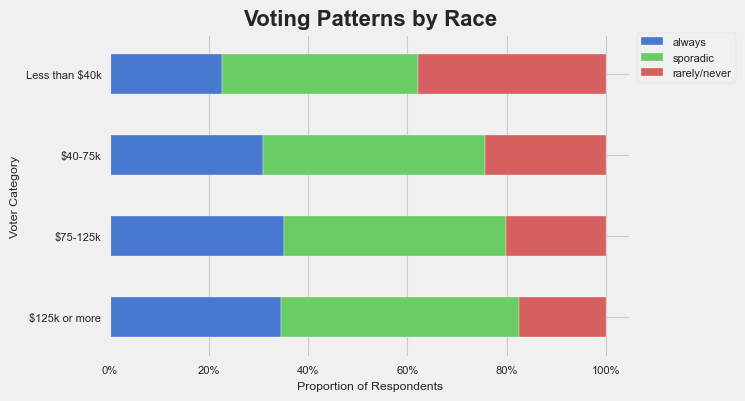

In [188]:
order = ['$125k or more', '$75-125k', '$40-75k', 'Less than $40k']
normalized_stacked_barplots(df=df, column='income_cat', order=order)

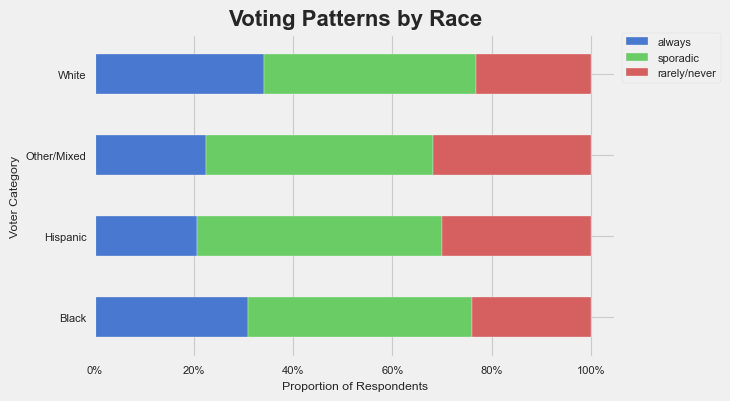

In [190]:
normalized_stacked_barplots(df=df, column='race')

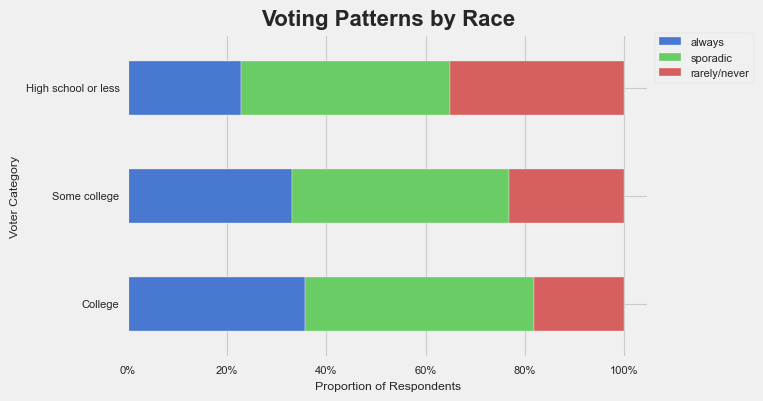

In [192]:
order = ['College', 'Some college', 'High school or less']
normalized_stacked_barplots(df=df, column='educ', order=order)

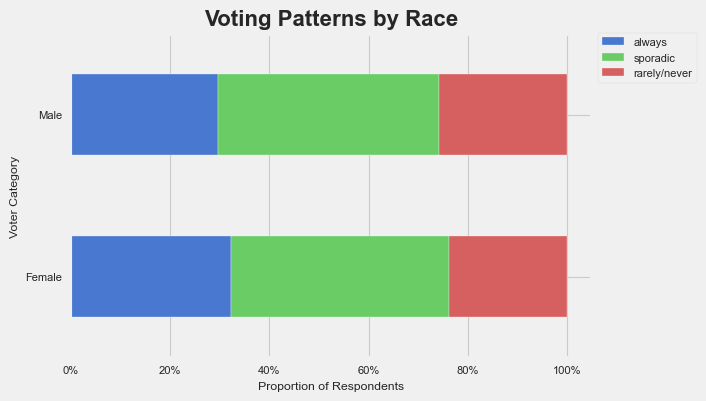

In [198]:
normalized_stacked_barplots(df=df, column='gender')

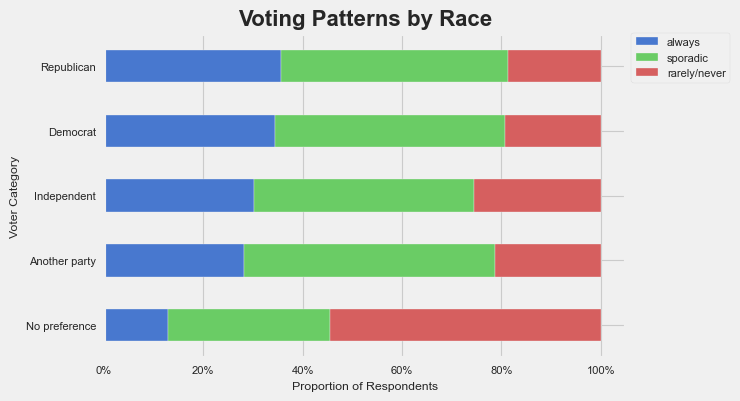

In [210]:
order = ['No preference', 'Another party', 'Independent', 'Democrat', 'Republican']
normalized_stacked_barplots(df=df, column='Q30', order=order)

# Subplots

Subplots are a type of visualization where we can show many plots side by side. This makes it easy to make comparisons between groups



Let's analyze question 18 - Have you or any members of your household ​ever​ experienced the following situations
when trying to vote?

1. Was told they did not have the correct identification
2. Could not find the polling place
3. Missed the voter registration deadline
4. Was unable to physically access the polling place
5. Could not obtain necessary assistance to fill out a ballot
6. Had to cast a provisional ballot
7. Couldn’t get off work to vote when polls were open
8. Waited in line to vote for more than an hour
9. Was told name was not on the list even though they were registered
10. Did not receive absentee or mail-in ballot in time

Users responded with a 1 for yes and a 2 for no. 

In [230]:
# first we will grab the question 18 subquestions. We can grab the columns by column number using .iloc[] method. 
# Here we grab all rows (indicated by `:`) and columns [58 to 68]. 
# We also add in the voter_category column as well
q18 = pd.concat([df.iloc[:, 58:68], df['voter_category']], axis=1)

# since the data was casted with 1 Yes and 2 for No, we will recast to the standard 0 to False and 1 to True mapping
q18 = q18.replace({1: 1, 2: 0})
q18

,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,voter_category
0,0,0,0,0,0,0,0,0,0,0,always
1,0,0,0,0,0,0,0,0,0,0,always
2,0,0,0,0,0,0,1,0,0,0,sporadic
3,0,0,0,0,0,0,0,0,0,0,sporadic
4,0,0,0,0,0,0,0,0,0,0,always
...,...,...,...,...,...,...,...,...,...,...,...
5831,0,0,1,0,0,0,0,0,0,0,always
5832,0,0,1,0,0,0,0,1,0,0,rarely/never
5833,0,0,0,0,0,1,0,0,0,0,sporadic
5834,0,1,1,1,1,0,1,0,0,1,always


In [253]:
pt = q18.pivot_table(index='voter_category', aggfunc='sum') / q18.shape[0]
pt[['Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10']]

,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10
voter_category,,,,,,,,,,
always,0.004455,0.009082,0.008053,0.008568,0.002570,0.009596,0.019705,0.055517,0.008053,0.014565
rarely/never,0.004798,0.011995,0.021419,0.008225,0.000171,0.002228,0.026388,0.035984,0.009596,0.009938
sporadic,0.010624,0.018506,0.018334,0.013537,0.002399,0.012337,0.039925,0.088759,0.019534,0.022104


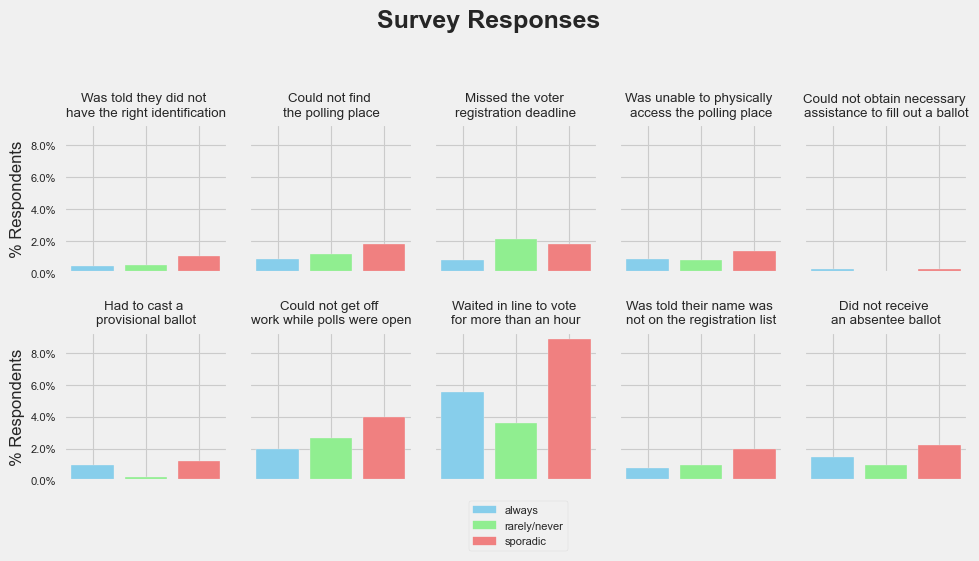

In [303]:
fig, ax = plt.subplots(2,5, figsize=(10,6), sharey=True)
ax[0,0].bar(pt.index, pt['Q18_1'], color=['skyblue', 'lightgreen', 'lightcoral'])
ax[0,0].set_title('Was told they did not \nhave the right identification')

ax[0,1].bar(pt.index, pt['Q18_2'], color=['skyblue', 'lightgreen', 'lightcoral'])
ax[0,1].set_title('Could not find \nthe polling place')

ax[0,2].bar(pt.index, pt['Q18_3'], color=['skyblue', 'lightgreen', 'lightcoral'])
ax[0,2].set_title('Missed the voter \nregistration deadline')

ax[0,3].bar(pt.index, pt['Q18_4'], color=['skyblue', 'lightgreen', 'lightcoral'])
ax[0,3].set_title('Was unable to physically \naccess the polling place')

ax[0,4].bar(pt.index, pt['Q18_5'], color=['skyblue', 'lightgreen', 'lightcoral'])
ax[0,4].set_title('Could not obtain necessary \nassistance to fill out a ballot')

ax[1,0].bar(pt.index, pt['Q18_6'], color=['skyblue', 'lightgreen', 'lightcoral'])
ax[1,0].set_title('Had to cast a \nprovisional ballot')

ax[1,1].bar(pt.index, pt['Q18_7'], color=['skyblue', 'lightgreen', 'lightcoral'])
ax[1,1].set_title('Could not get off \nwork while polls were open')

ax[1,2].bar(pt.index, pt['Q18_8'], color=['skyblue', 'lightgreen', 'lightcoral'])
ax[1,2].set_title('Waited in line to vote \nfor more than an hour')

ax[1,3].bar(pt.index, pt['Q18_9'], color=['skyblue', 'lightgreen', 'lightcoral'])
ax[1,3].set_title('Was told their name was \nnot on the registration list')

ax[1,4].bar(pt.index, pt['Q18_10'], color=['skyblue', 'lightgreen', 'lightcoral'])
ax[1,4].set_title('Did not receive \nan absentee ballot')

ax[0,0].yaxis.set_major_formatter(PercentFormatter(1))
ax[1,0].yaxis.set_major_formatter(PercentFormatter(1))

# create a custom legend object
# https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
colors = {'always': 'skyblue', 'rarely/never':'lightgreen', 'sporadic':'lightcoral'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax[1,2].legend(handles, labels, bbox_to_anchor=(0.85, -0.1))

# turn off x labels
for i in range(0, 5):
    ax[0, i].xaxis.set_ticklabels([])
    ax[1, i].xaxis.set_ticklabels([])

# axis labels and titles
ax[0, 0].set_ylabel('% Respondents', fontsize=12)
ax[1, 0].set_ylabel('% Respondents', fontsize=12)
fig.suptitle('Survey Responses', fontsize=18, weight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
